In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import statsmodels.api as sm
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import t
import warnings
from scipy.stats import ttest_1samp

Problem statement
-----
LendingClub is online loan markplace providing loan to customer through fast online interface. For each loan application company has to make either of two decision:

1. Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:\
    Fully paid: Applicant has fully paid the loan (the principal and the interest rate)\
    Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.\
    Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 
2. Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

------
Lending business has its own risk which result in credit loss. 

#### Credit loss is amount of money lost by lender when borower do not payback the loan. In this case study such loans are identified as 'charged-off' which ideally would be called as 'defaulters'

Scope of the project
-----

### To identify risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. 
----
#### 1. Identification of such applicants using EDA is the aim of this case study.
#### 2. In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  
#### 3. The company can utilise this knowledge for its portfolio and risk assessment. 

-----
Write all your code in one well-commented Python file; briefly mention the insights and observations from the analysis 

1. Present the overall approach of the analysis in a presentation:
2. Mention the problem statement and the analysis approach briefly
3. Explain the results of univariate, bivariate analysis etc. in business terms
4. Include visualisations and summarise the most important results in the presentation
 
#### You need to submit one Ipython notebook which clearly explains the thought process behind your analysis (either in comments of markdown text), code and relevant plots. 

Important Note: Please make sure to rename your Python notebook "Group_Facilitator_Name.ipynb". 

You need to submit a GitHub repository link that contains the files above . You need to write a README.md for the GitHub repository.  You can follow the video below to understand how to create the GitHub repository. Make sure your GitHub link is public. 

In [2]:
#import data for loan
#lending_club = loan_raw_data file

loan_raw_data = pd.read_csv("loan.csv")

/var/folders/6c/z987x7hd2t537bvytghjkgv00000gn/T/ipykernel_44886/3954629887.py:4: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_raw_data = pd.read_csv("loan.csv")


In [3]:
# code to identify total number of row and column in database
loan_raw_data.shape

(39717, 111)

In [4]:
# code for obtaining column name in list. 
# This list will be used to further manipulate the dataframe by either adding or removing columns
column_names = loan_raw_data.columns.tolist()
print("Column id:" , column_names)

Column id: ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m

--------

### Data Cleaning
1. To identify columns with 100% missing data. This is clubbed with identifying columns with more than 30% missing data.
2. To identify columns haivng only unique values

Since the loan data has huge number of columns with missing data, all these columns needs to be removed to reduce the data for analysis. List comprehension is created to identify all columns with more than 30% - 100% of data missing using following code.

Subset of data is created on which further analysis will be done. 
New dataframe with name "Loan_Review_data" is created by dropping the columns with 100% missing data.

In [5]:
# To identify the columns which are blanks. 
# Since data is large, display options will need to be set to max for columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

# identify missing values in each column
missing_data = 100 * loan_raw_data.isnull().mean()
print("Missing columns:", missing_data)


Missing columns: id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.585543
purpose                             0.000000
title                               0.

In [6]:
# code for filtering columns with more than 30% data missing.
missing_percent = loan_raw_data.isnull().mean() * 100
columns_missing = [column for column in loan_raw_data.columns if missing_percent[column] > 30]

# code for removing columns having more than 30% missing data (i.e. it identifies columns which have 30% data missing)
loan_review_subdata = loan_raw_data.drop(columns=columns_missing)


# Identify columns which do not have duplicate values
columns_with_duplicates = loan_review_subdata.columns[loan_review_subdata.apply(lambda x: x.nunique() < len(loan_review_subdata))]

# Create a subset DataFrame by dropping columns without duplicates
loan_subdata = loan_review_subdata.drop(columns=set(loan_review_subdata.columns) - set(columns_with_duplicates), axis=1)


# list of columns that can be removed from analysis
extra_columns = ['emp_title', 'emp_length', 'pymnt_plan', 'title', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens']

# Drop the specified columns. Resulting dataframe will be used as final dataframe for analysis
loan_data = loan_subdata.drop(columns=extra_columns)

update_column_names = loan_data.columns.tolist()
print("Updated Column Name:" , update_column_names)
len(column_names)


Updated Column Name: ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt']


111

------

#### Data processing and arranging
1. Data is arrange in list with two classification. (a) Data with more than 30 unique value and (b) data with less than equal to 30 unique value
2. Data is arranged in list with two classification. (a) Numerical data and (b) categorical data. To do this data with less than equal to 30 unique value is considered as categorical data
3. Interest rate data is converted into numberical values.
4. 2 columns are added by converting loan status and loan verified data into numerical values

In [7]:
loan_data.nunique()

loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
purpose                       14
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
open_acc                      40
pub_rec                        5
revol_bal                  21711
revol_util                  1089
total_acc                     82
out_prncp                   1137
out_prncp_inv               1138
total_pymnt                37850
total_pymnt_inv            37518
total_rec_prncp             7976
total_rec_

In [8]:
# Converting loan status data into numerical values and adding column to dataset
def map_loan_status(status):
    if status == "Fully Paid":
        return 1
    elif status == "Current":
        return 2
    elif status == "Charged Off":
        return 3
    else:
        return None

# Adding new column 'loan_status_numerical' using the apply function
loan_data['loan_status_numerical'] = loan_data['loan_status'].apply(map_loan_status)

loan_data.head(3)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,loan_status_numerical
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,171.62,1
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,119.66,3
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,649.91,1


In [9]:
# Converting loan verified data into numerical values and adding column to dataset
def map_verification_status(status):
    if status == "Source Verified":
        return 1
    elif status == "Verified":
        return 1
    elif status == "Not Verified":
        return 0
    else:
        return None 

loan_data['loan_verified_numerical'] = loan_data['verification_status'].apply(map_verification_status)


# Count of total number of verified loans and count of loans that have status charged off
num_verified_loans = len(loan_data[loan_data['verification_status'] == 'Verified'])
num_verified_charged_off = len(loan_data[(loan_data['verification_status'] == 'Verified') & (loan_data['loan_status'] == 'Charged Off')])
print("Number of Verified Loans:", num_verified_loans)
print("Number of Charged Off Verified Loans:", num_verified_charged_off)

# Count of total number of source verified loans and count of loans that have status charged off
num_source_verified_loans = len(loan_data[loan_data['verification_status'] == 'Source Verified'])
num_source_verified_charged_off = len(loan_data[(loan_data['verification_status'] == 'Source Verified') & (loan_data['loan_status'] == 'Charged Off')])
print("Number of Source Verified Loans:", num_source_verified_loans)
print("Number of Charged Off Source Verified Loans:", num_source_verified_charged_off)

# Count of total number of non verified loans and count of loans that have status charged off
num_non_verified_loans = len(loan_data[loan_data['verification_status'] == 'Not Verified'])
num_non_verified_charged_off = len(loan_data[(loan_data['verification_status'] == 'Not Verified') & (loan_data['loan_status'] == 'Charged Off')])
print("Number of Non-Verified Loans:", num_non_verified_loans)
print("Number of Charged Off Non-Verified Loans:", num_non_verified_charged_off)

# Display the DataFrame to verify the new column
loan_data.head(3)

Number of Verified Loans: 12809
Number of Charged Off Verified Loans: 2051
Number of Source Verified Loans: 9987
Number of Charged Off Source Verified Loans: 1434
Number of Non-Verified Loans: 16921
Number of Charged Off Non-Verified Loans: 2142


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,loan_status_numerical,loan_verified_numerical
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,171.62,1,1
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,119.66,3,1
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,649.91,1,0


In [10]:

# to identify the columns which have more than 30 unique value. These columns will be used for categorical data analysis
unique_columns = loan_data.nunique()
columns_morethan_30unique = unique_columns[unique_columns>30].index.tolist()
columns_lessthan_30unique = unique_columns[unique_columns<=30].index.tolist()
print("Columns with more than 30 unique:",columns_morethan_30unique)
print("Columns with less than 30 unique:",columns_lessthan_30unique)
len(extra_columns)

Columns with more than 30 unique: ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'sub_grade', 'annual_inc', 'issue_d', 'zip_code', 'addr_state', 'dti', 'earliest_cr_line', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt']
Columns with less than 30 unique: ['term', 'grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'loan_status_numerical', 'loan_verified_numerical']


15

In [11]:
# coverting interset value from str to float
loan_data["int_rate"] = loan_data["int_rate"].str.replace("%", "").astype(float)

In [12]:
# create list of columns containing integer dtypes
numerical = loan_data.select_dtypes(include=['int','float'])

final_numerical = numerical.columns.tolist()
print("Numerical Columns:" , final_numerical)

# creat list of columns containing strng or object dtypes
category = loan_data.select_dtypes(include=['object'])

final_categorical = category.columns.tolist()
print("Category Columns:", final_categorical)


Numerical Columns: ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'loan_status_numerical', 'loan_verified_numerical']
Category Columns: ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util']


In [13]:
# List of colimns for numerical and categorical analysis
numerical_columns = ['loan_amnt', 'int_rate', 'installment', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'revol_bal', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt']
category_columns = ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose']


------

### Performing EDA:
1. Preparing plot of categorical data to evaluate any trend in data on single column
2. Prepare plot of numerical data to evaluate any trend in numerical data in single column
3. Preparing plot of categorical and numberical data to see any correlation between the data
4. Prepare correlation plot of numberical data with numerical data to evaluate any trend between the data

Countplot of term


/var/folders/6c/z987x7hd2t537bvytghjkgv00000gn/T/ipykernel_44886/809520086.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels


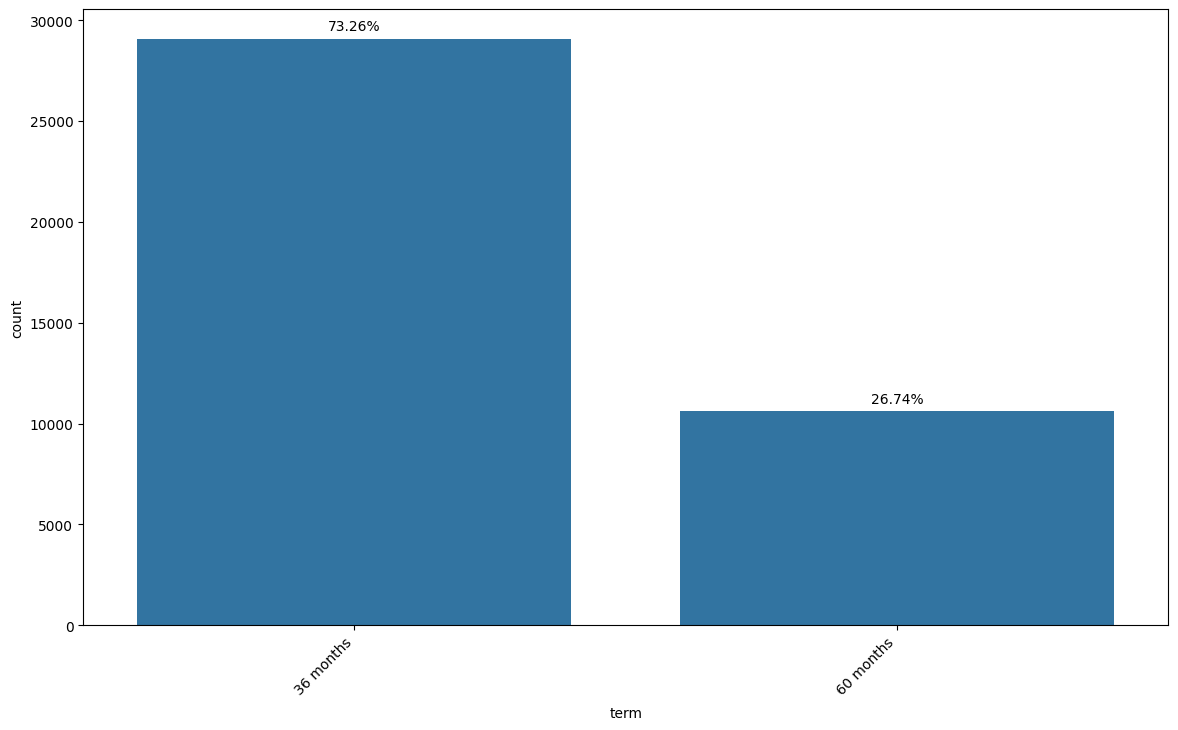

Countplot of grade


/var/folders/6c/z987x7hd2t537bvytghjkgv00000gn/T/ipykernel_44886/809520086.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels


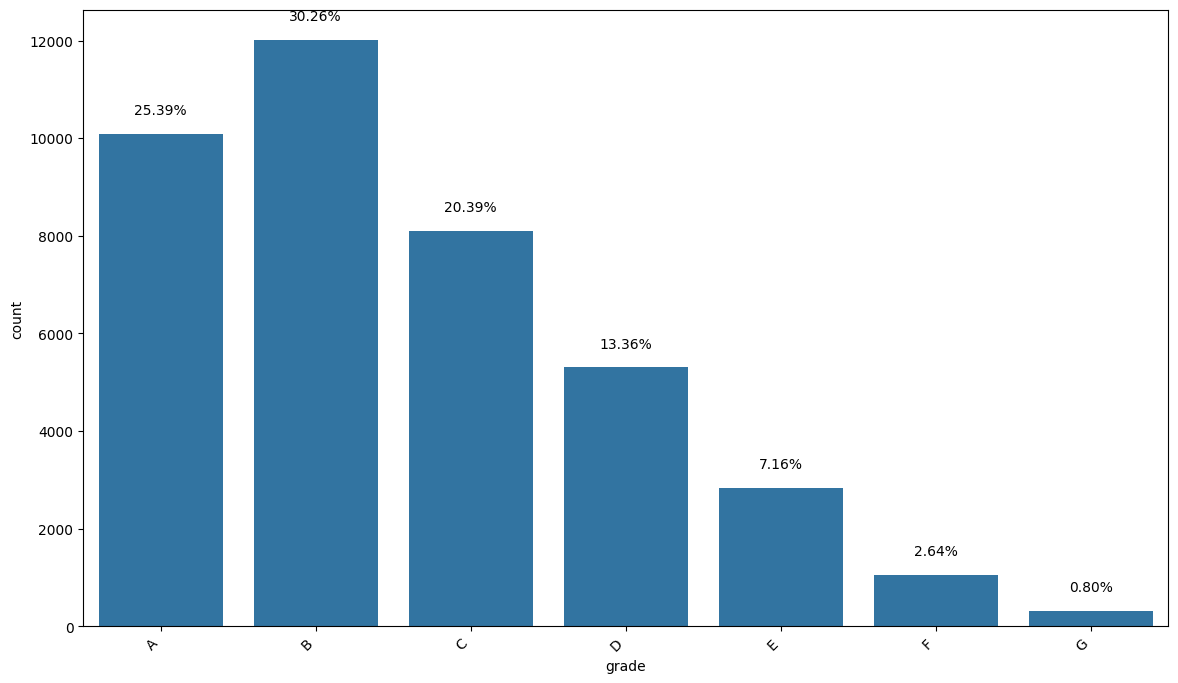

Countplot of sub_grade


/var/folders/6c/z987x7hd2t537bvytghjkgv00000gn/T/ipykernel_44886/809520086.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels


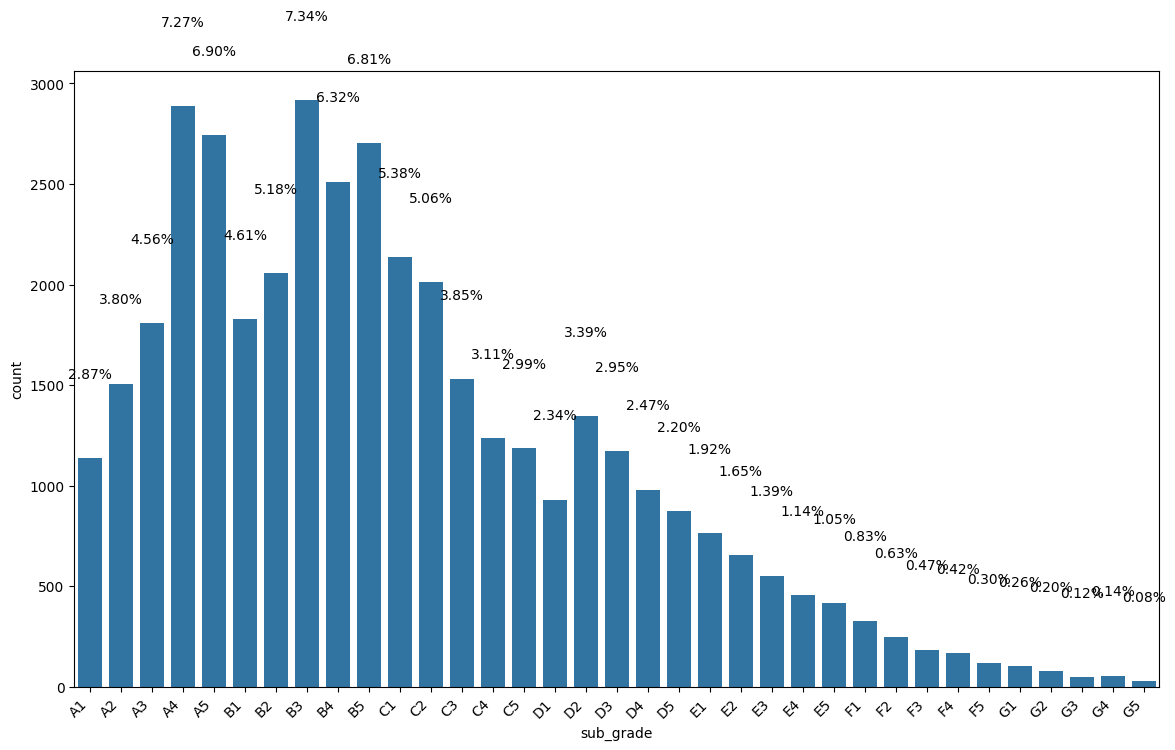

Countplot of home_ownership


/var/folders/6c/z987x7hd2t537bvytghjkgv00000gn/T/ipykernel_44886/809520086.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels


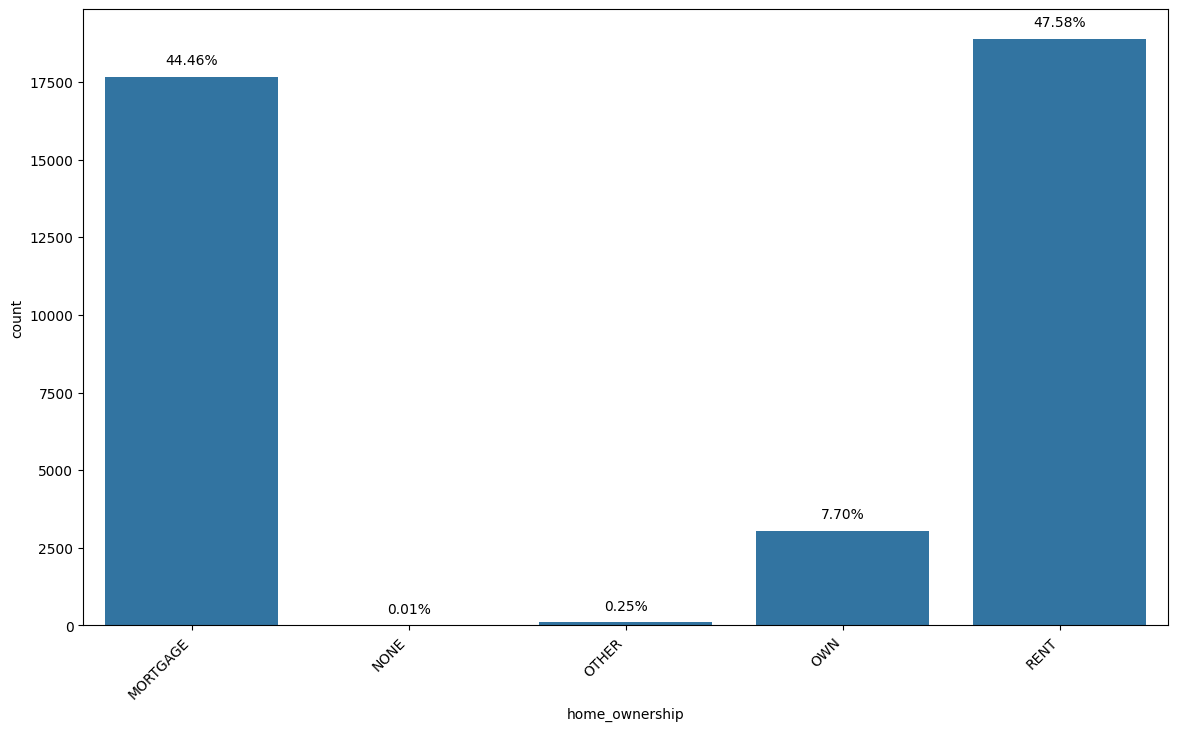

Countplot of verification_status


/var/folders/6c/z987x7hd2t537bvytghjkgv00000gn/T/ipykernel_44886/809520086.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels


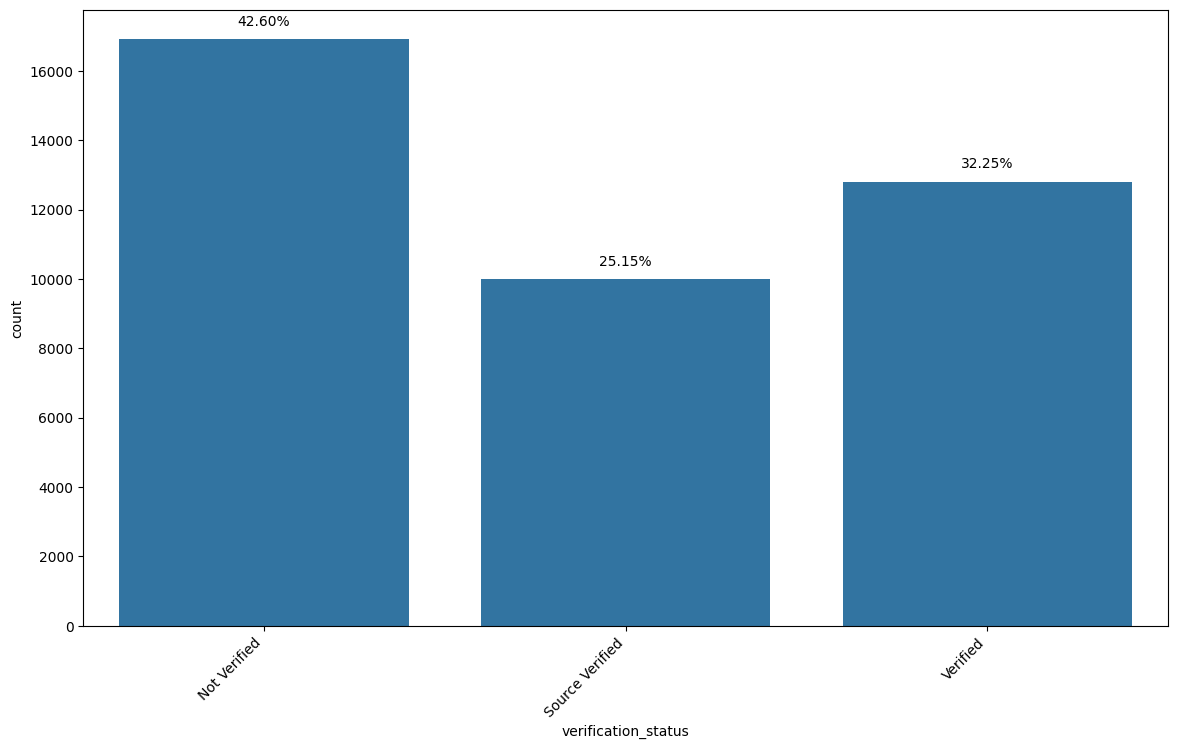

Countplot of loan_status


/var/folders/6c/z987x7hd2t537bvytghjkgv00000gn/T/ipykernel_44886/809520086.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels


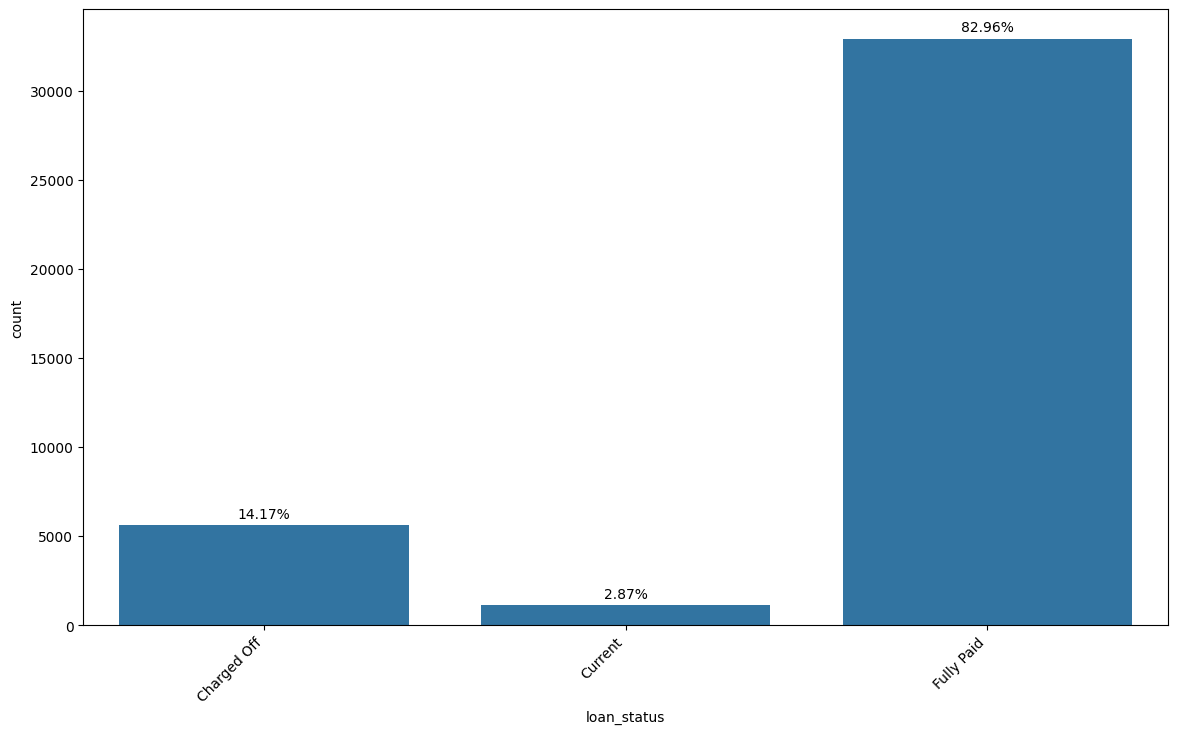

Countplot of purpose


/var/folders/6c/z987x7hd2t537bvytghjkgv00000gn/T/ipykernel_44886/809520086.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels


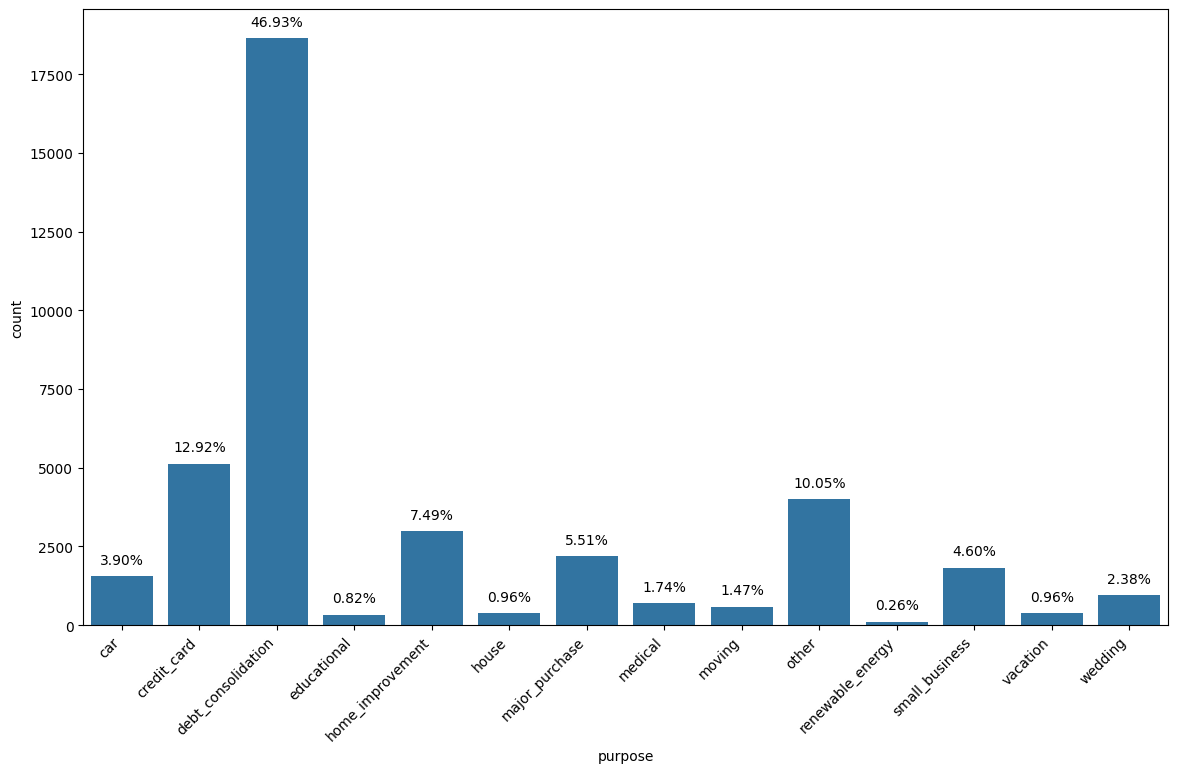

In [14]:
#code for categorical analysis
for i in category_columns:
    plt.figure(figsize=(14, 8))
    print("Countplot of", i)
    
    # Sort the unique values of the column
    sorted_values = loan_data[i].sort_values().unique()
    
    ax = sns.countplot(x=loan_data[i], order=sorted_values)
    
    # Calculate the percentage of each category
    total = float(len(loan_data[i]))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + total * 0.01,  # Adjust the vertical position here
                '{:.2f}%'.format((height / total) * 100),
                ha='center')
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
    plt.show()


Histplot of loan_amnt


/var/folders/6c/z987x7hd2t537bvytghjkgv00000gn/T/ipykernel_44886/3387775123.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels


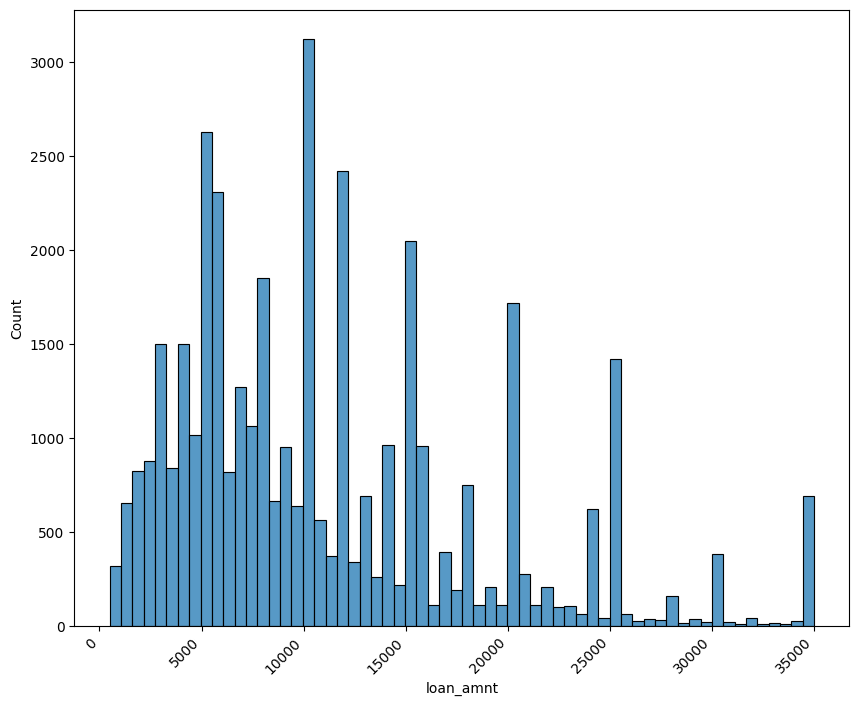

Histplot of int_rate


/var/folders/6c/z987x7hd2t537bvytghjkgv00000gn/T/ipykernel_44886/3387775123.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels


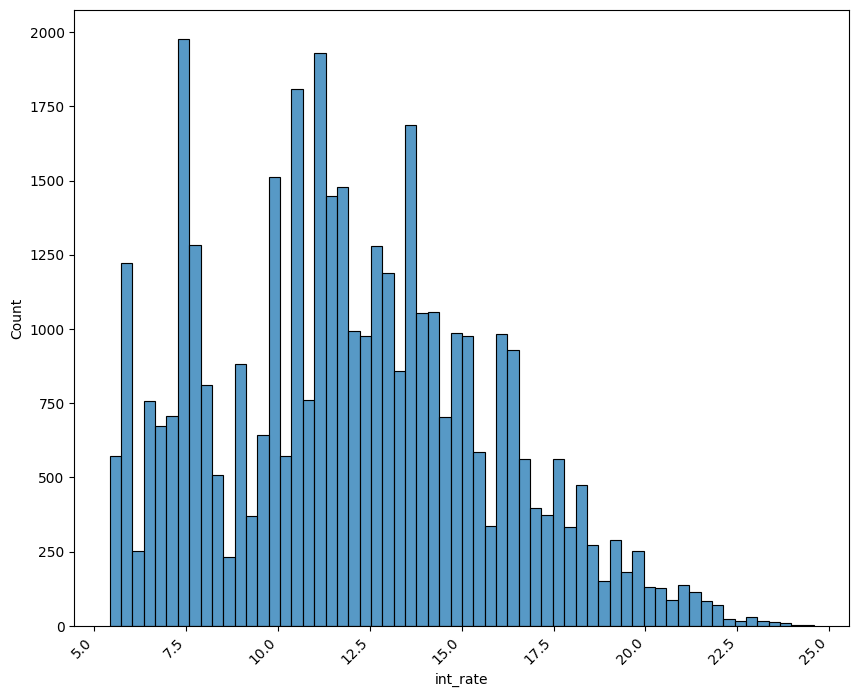

Histplot of installment


/var/folders/6c/z987x7hd2t537bvytghjkgv00000gn/T/ipykernel_44886/3387775123.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels


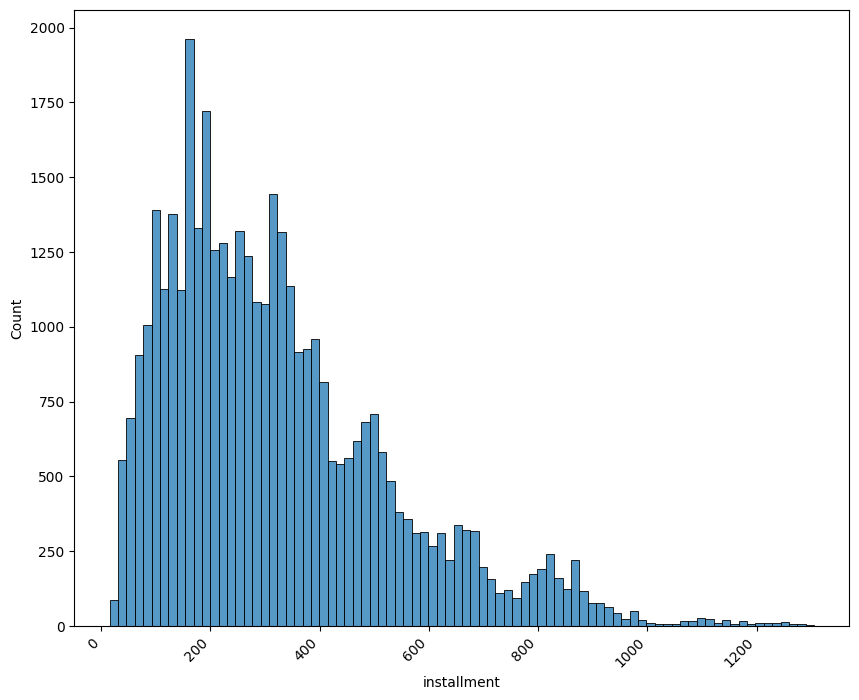

Histplot of dti


/var/folders/6c/z987x7hd2t537bvytghjkgv00000gn/T/ipykernel_44886/3387775123.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels


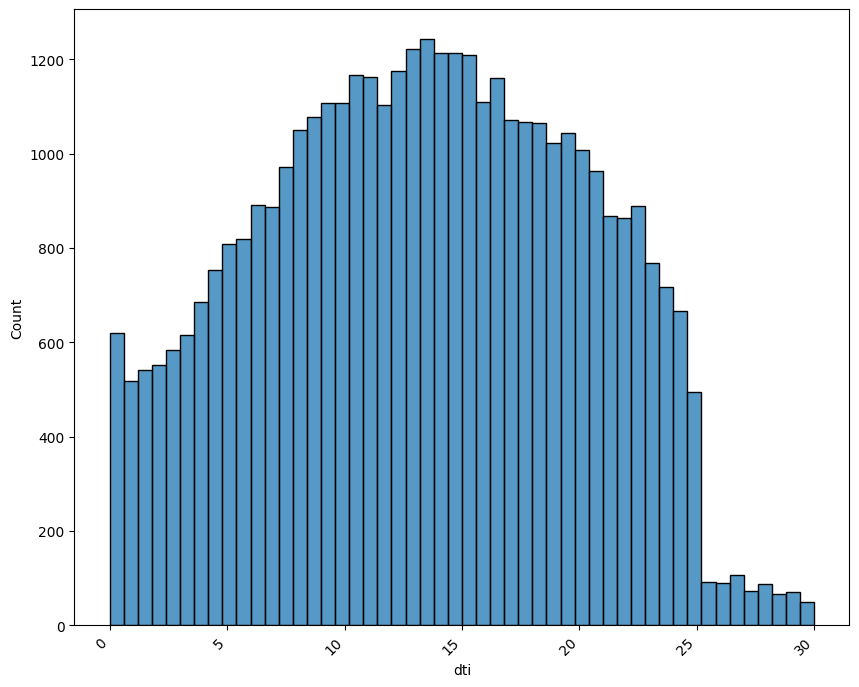

In [15]:
# code for numerical analysis
numerical_col = ['loan_amnt', 'int_rate', 'installment', 'dti']
for i in numerical_col:
    plt.figure(figsize=(10, 8))
    print("Histplot of", i)
    ax = sns.histplot(x=loan_data[i])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
    plt.show()

Boxplot of term vs loan_amnt


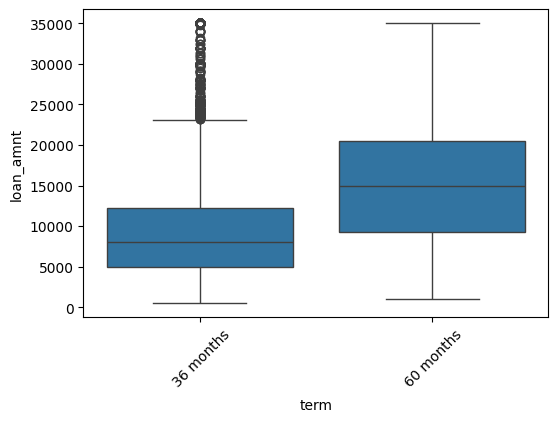

Boxplot of term vs int_rate


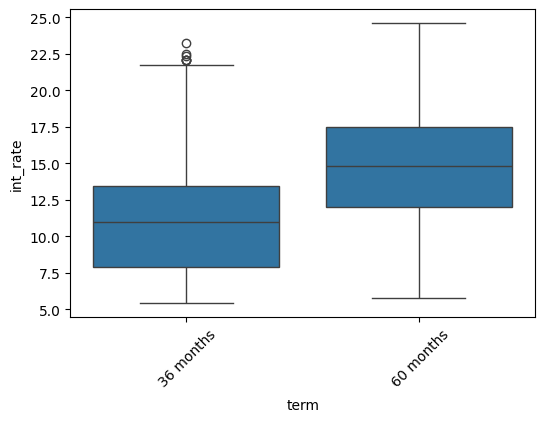

Boxplot of grade vs loan_amnt


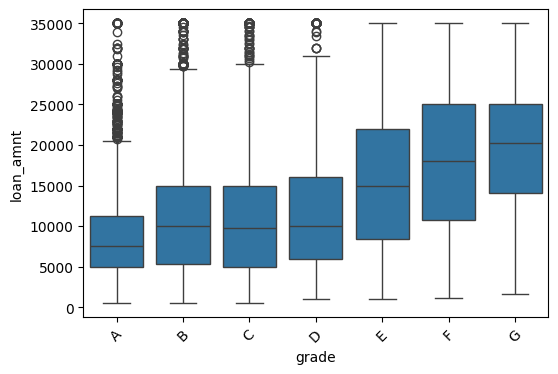

Boxplot of grade vs int_rate


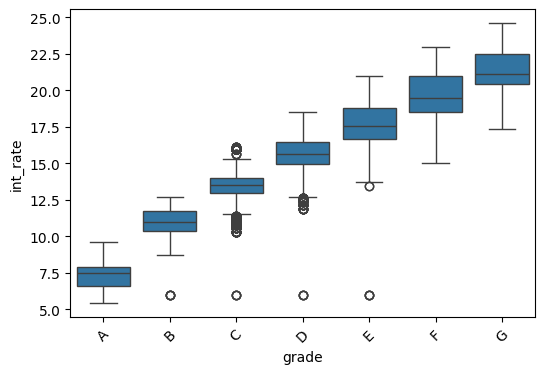

Boxplot of verification_status vs loan_amnt


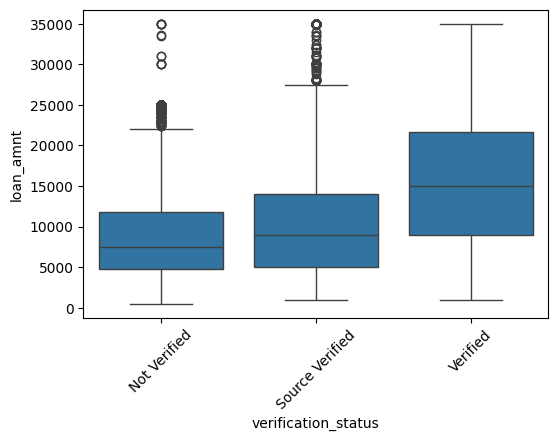

Boxplot of verification_status vs int_rate


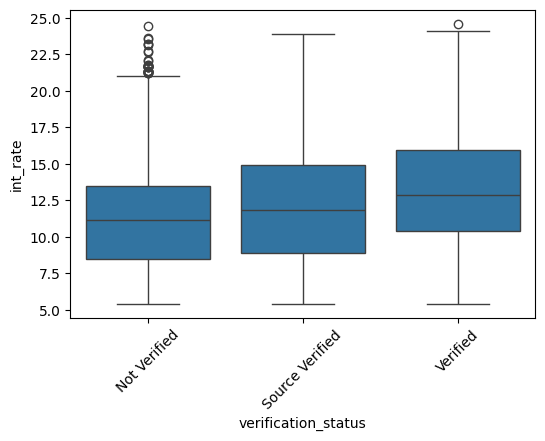

Boxplot of loan_status vs loan_amnt


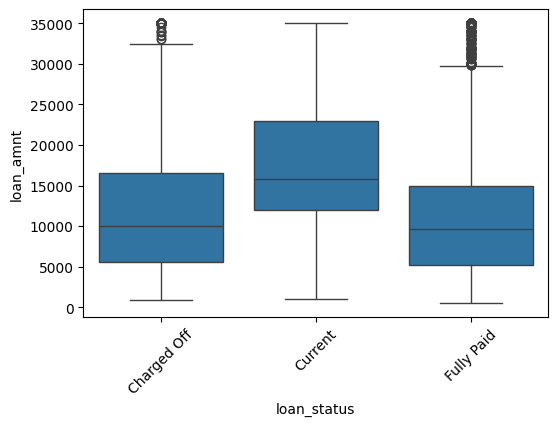

Boxplot of loan_status vs int_rate


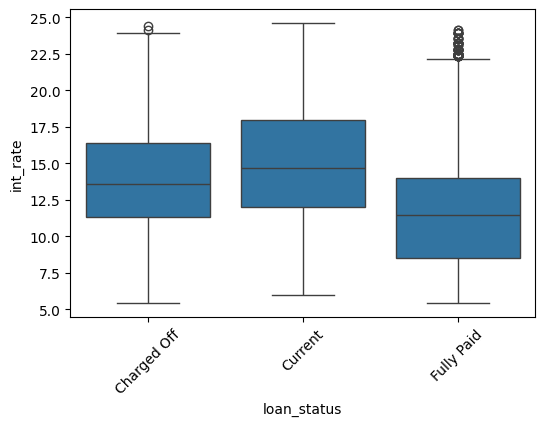

In [16]:
# Code for comparative analysis

numerical_col = ['loan_amnt', 'int_rate']
category_col = ['term', 'grade', 'verification_status', 'loan_status']

for col1 in category_col:
    for col2 in numerical_col:
        print("Boxplot of", col1, "vs", col2)
        sorted_data = loan_data.sort_values(by=col1)
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=sorted_data[col1], y=sorted_data[col2])
        plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
        plt.show()

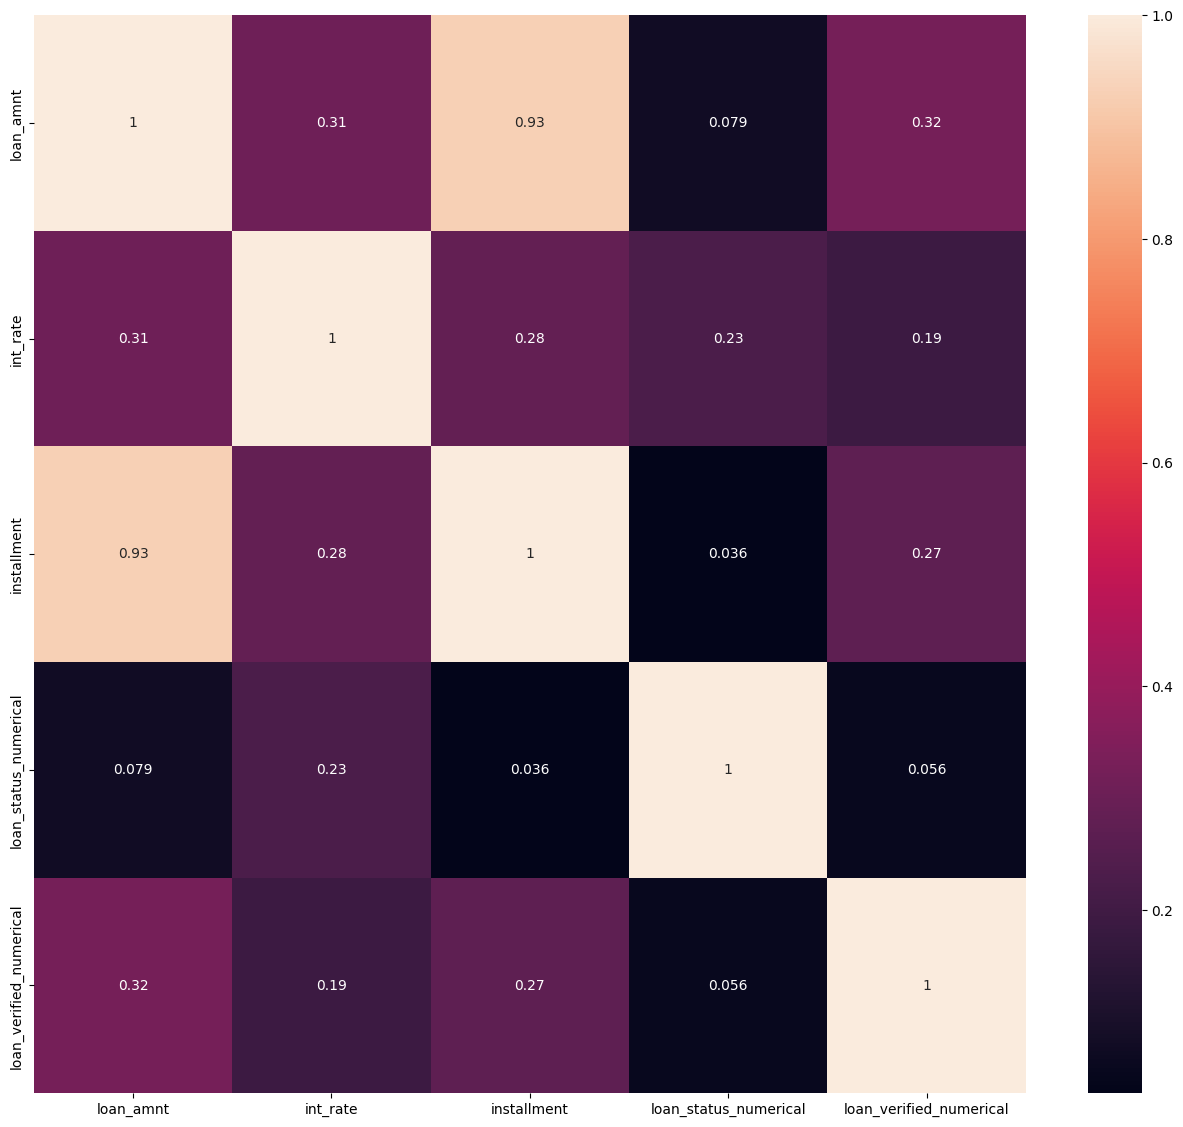

In [17]:
# Co-relation analysis of data
plt.figure(figsize=(16,14))
sns.heatmap(loan_data[['loan_amnt', 'int_rate', 'installment','loan_status_numerical', 'loan_verified_numerical']].corr(),annot=True)
plt.show()

--------

## Statistical analysis

### Analysis 1: To detrmine if there is any difference in interest rate of loan that are fully paid vs loans that are charged off.

Approach:
1. Interest rate data is divided into 2 parts. (a) interest rate of loan that are fully paid vs (b) interest rate of loan that is charged off.
2. 1 pair t-test is performed on this data to evaluate if there is any difference between these two data.

#### Rational for using 1-pair t-test is because this is qualititative analysis to determine if there is any statistical difference between interest rate of fully paid loan vs charged off loan 

There is a significant difference in interest rates between fully paid and charged off loans.
Correlation coefficient between interest rate and loan status: 0.22682244008258556


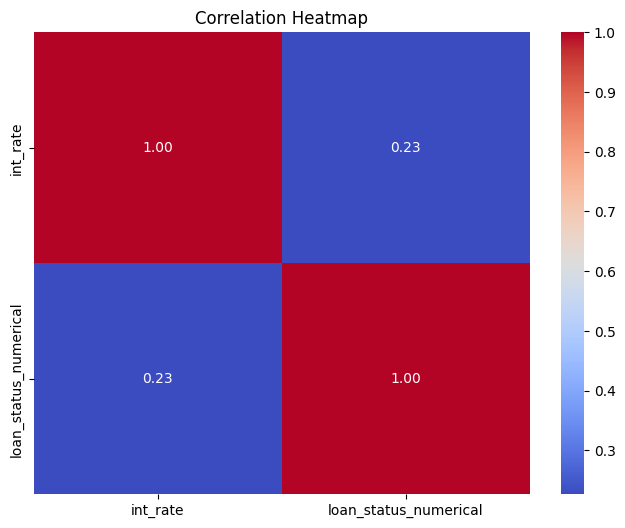

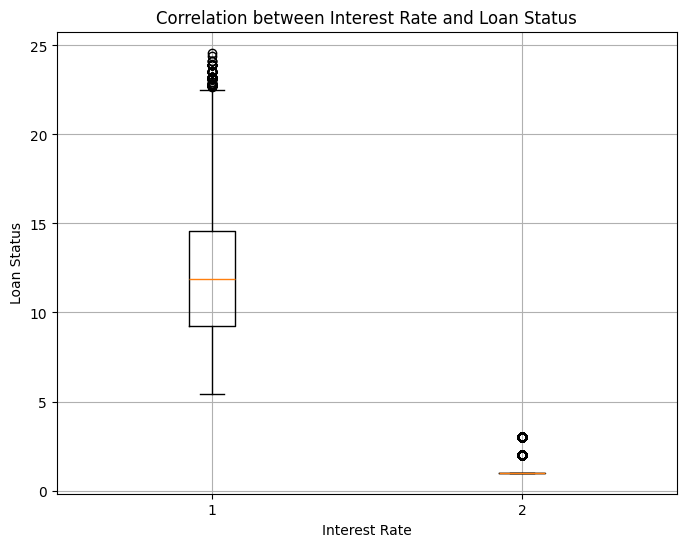

Correlation between Interest Rate and Loan Status: 0.22682244008258556


In [18]:
# Subseting the data for fully paid and charged off loans
fully_paid_interest_rates = loan_data.loc[loan_data['loan_status'] == 'Fully Paid', 'int_rate']
charged_off_interest_rates = loan_data.loc[loan_data['loan_status'] == 'Charged Off', 'int_rate']

# independent 1 pair t-test
t_stat, p_value = ttest_ind(fully_paid_interest_rates, charged_off_interest_rates)

# Interpreting p value
if p_value < 0.05:
    print("There is a significant difference in interest rates between fully paid and charged off loans.")
else:
    print("There is no significant difference in interest rates between fully paid and charged off loans.")

# calculating correlation
correlation = loan_data['int_rate'].corr(loan_data['loan_status_numerical'])
print("Correlation coefficient between interest rate and loan status:", correlation)

# correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(loan_data[['int_rate', 'loan_status_numerical']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# correlation boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([loan_data['int_rate'],loan_data['loan_status_numerical']])
plt.title('Correlation between Interest Rate and Loan Status')
plt.xlabel('Interest Rate')
plt.ylabel('Loan Status')
plt.grid(True)
plt.show()

print("Correlation between Interest Rate and Loan Status:", correlation)

--------

### Analysis 2: To detrmine if there is any difference in default rate of loan that are verified or source verified vs. unverified laons.

Approach:
1. Default rate is calculated from loan status and loan verified data. Loan verified data is convered in numberical data to have quantitative evaluation. From this data default rate of verified loan vs unverified loan is determined.
2. From this data statistical parameter like confidence interval, sample size, pooled standard deviaiton, margin of error are calculated and 2 pair t-test is performed on this data to evaluate if there is any difference between these two data. 

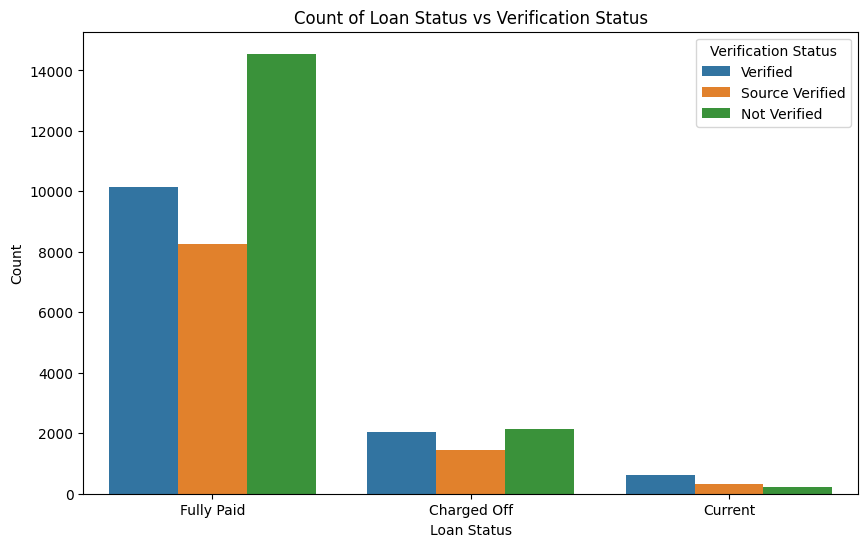

Verified Default Rate: 0.1528776978417266
Unverified Default Rate: 0.12658826310501745
t-statistic: 11.0787035624913
p-value: 1.7522724340247096e-28
Confidence Level: 0.95
Confidence Interval (95.0%): (9.697329608071676, 12.460077516910925)
Alpha value: 0.050000000000000044
There is a significant difference in default rates between verified and unverified loans at 95.0 % confidence level.
The probability of a difference in default rates is statistically significant.


In [19]:
# Calculating default rates
num_verified_charged_off = len(loan_data[(loan_data['loan_verified_numerical'] == 1) & (loan_data['loan_status'] == 'Charged Off')])
num_verified_loans = len(loan_data[loan_data['loan_verified_numerical'] == 1])
verified_default_rate = num_verified_charged_off / num_verified_loans

num_unverified_charged_off = len(loan_data[(loan_data['loan_verified_numerical'] == 0) & (loan_data['loan_status'] == 'Charged Off')])
num_unverified_loans = len(loan_data[loan_data['loan_verified_numerical'] == 0])
unverified_default_rate = num_unverified_charged_off / num_unverified_loans

# Ploting count of loan status vs verification status
plt.figure(figsize=(10, 6))
sns.countplot(x='loan_status', hue='verification_status', data=loan_data)
plt.title('Count of Loan Status vs Verification Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.legend(title='Verification Status')
plt.show()

# Calculating sample standard deviations
std_verified = np.std(loan_data.loc[loan_data['loan_verified_numerical'] == 1, 'loan_status_numerical'], ddof=1)
std_unverified = np.std(loan_data.loc[loan_data['loan_verified_numerical'] == 0, 'loan_status_numerical'], ddof=1)

# Calculating sample sizes
n_verified = len(loan_data.loc[loan_data['loan_verified_numerical'] == 1])
n_unverified = len(loan_data.loc[loan_data['loan_verified_numerical'] == 0])

# Calculating pooled standard deviation
pooled_std = np.sqrt(((n_verified - 1) * std_verified ** 2 + (n_unverified - 1) * std_unverified ** 2) / (n_verified + n_unverified - 2))

# Performing independent two-tailed t-test
t_stat, p_value = ttest_ind(
    loan_data.loc[loan_data['loan_verified_numerical'] == 1, 'loan_status_numerical'],
    loan_data.loc[loan_data['loan_verified_numerical'] == 0, 'loan_status_numerical']
)

# Calculating degrees of freedom
degrees_of_freedom = len(loan_data[(loan_data['loan_verified_numerical'] == 1) & (loan_data['loan_status'] == 'Charged Off')]) + len(loan_data[(loan_data['loan_verified_numerical'] == 0) & (loan_data['loan_status'] == 'Charged Off')]) - 2

# Calculating confidence level
confidence_level = 0.95

# Calculating confidence interval
ci_lower, ci_upper = t.interval(confidence_level, df=degrees_of_freedom, loc=t_stat, scale=pooled_std)

# Calculating alpha
alpha = 1 - confidence_level

# Printing the results
print("Verified Default Rate:", verified_default_rate)
print("Unverified Default Rate:", unverified_default_rate)
print("t-statistic:", t_stat)
print("p-value:", p_value)
print("Confidence Level:", confidence_level)
print("Confidence Interval ({}%): ({}, {})".format(confidence_level * 100, ci_lower, ci_upper))
print("Alpha value:", alpha)

#Interpreting the result
if p_value < alpha:
    print("There is a significant difference in default rates between verified and unverified loans at", confidence_level * 100, "% confidence level.")
    print("The probability of a difference in default rates is statistically significant.")
else:
    print("There is no significant difference in default rates between verified and unverified loans at", confidence_level * 100, "% confidence level.")
    print("The probability of a difference in default rates is not statistically significant.")

-------

### Analysis 3: To detrmine if there is any difference in default rate of loan based on dti? DTI is debt to income ratio.

Approach:
1. DTI value is divided into 2 parts. Loan with DTI of greater than 20 and loan with DTI or less than equal to 20. Loan having DTI more than 20 is classified as high DTI loan and remaining loans as low DTI loan.
2. Based on DTI values default rate is calculated as high DTI default rate vs low DTI defualt rate.
3. From this data statistical parameter like confidence interval, sample size, pooled standard deviaiton, margin of error are calculated and 2 pair t-test is performed on this data to evaluate if there is any difference between these two data. 

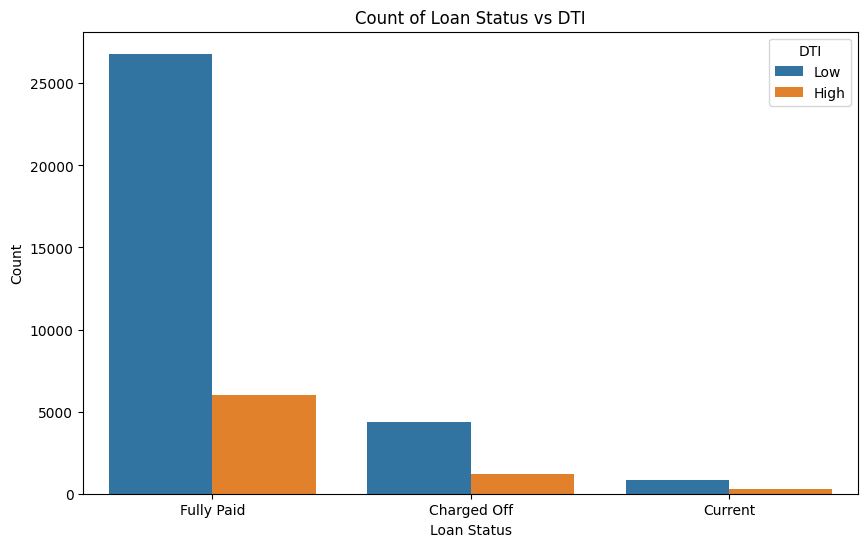

High DTI Default Rate: 0.16085969830463223
Low DTI Default Rate: 0.1372183950847142
t-statistic: 6.58977870776619
p-value: 4.459799209712588e-11
Confidence Level: 0.95
Confidence Interval (95.0%): (5.2070276160296105, 7.972529799502769)
Alpha value: 0.050000000000000044
There is a significant difference in default rates between high DTI and low DTI loans at 95.0 % confidence level.
The probability of a difference in default rates is statistically significant.


In [20]:
# Calculating high and low DTI. 
num_high_dti_charged_off = len(loan_data[(loan_data['dti'] > 20) & (loan_data['loan_status'] == 'Charged Off')])
num_high_dti_loans = len(loan_data[loan_data['dti'] > 20])

if num_high_dti_loans != 0:
    high_dti_default_rate = num_high_dti_charged_off / num_high_dti_loans
else:
    high_dti_default_rate = 0

num_low_dti_charged_off = len(loan_data[(loan_data['dti'] <= 20) & (loan_data['loan_status'] == 'Charged Off')])
num_low_dti_loans = len(loan_data[loan_data['dti'] <= 20])

if num_low_dti_loans != 0:
    low_dti_default_rate = num_low_dti_charged_off / num_low_dti_loans
else:
    low_dti_default_rate = 0

# Ploting count of loan status vs DTI
plt.figure(figsize=(10, 6))
sns.countplot(x='loan_status', hue=pd.cut(loan_data['dti'], bins=[0, 20, np.inf], labels=['Low', 'High']), data=loan_data)
plt.title('Count of Loan Status vs DTI')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.legend(title='DTI')
plt.show()

# Calculating sample sizes
n_high_dti = len(loan_data.loc[loan_data['dti'] > 20])
n_low_dti = len(loan_data.loc[loan_data['dti'] <= 20])

# Calculating sample standard deviations
std_high_dti = np.std(loan_data.loc[loan_data['dti'] > 20, 'loan_status_numerical'], ddof=1)
std_low_dti = np.std(loan_data.loc[loan_data['dti'] <= 20, 'loan_status_numerical'], ddof=1)

# Calculate the pooled standard deviation
pooled_std = np.sqrt(((n_high_dti - 1) * std_high_dti ** 2 + (n_low_dti - 1) * std_low_dti ** 2) / (n_high_dti + n_low_dti - 2))

# Perform independent two-tailed t-test
t_stat, p_value = ttest_ind(
    loan_data.loc[loan_data['dti'] > 20, 'loan_status_numerical'],
    loan_data.loc[loan_data['dti'] <= 20, 'loan_status_numerical']
)

# Calculate the degrees of freedom
degrees_of_freedom = len(loan_data[(loan_data['dti'] > 20) & (loan_data['loan_status'] == 'Charged Off')]) + len(loan_data[(loan_data['dti'] <= 20) & (loan_data['loan_status'] == 'Charged Off')]) - 2

# Calculate the confidence level
confidence_level = 0.95

# Calculate the confidence interval
ci_lower, ci_upper = t.interval(confidence_level, df=degrees_of_freedom, loc=t_stat, scale=pooled_std)

# Calculate alpha
alpha = 1 - confidence_level

# Print the results
print("High DTI Default Rate:", high_dti_default_rate)
print("Low DTI Default Rate:", low_dti_default_rate)
print("t-statistic:", t_stat)
print("p-value:", p_value)
print("Confidence Level:", confidence_level)
print("Confidence Interval ({}%): ({}, {})".format(confidence_level * 100, ci_lower, ci_upper))
print("Alpha value:", alpha)

if p_value < alpha:
    print("There is a significant difference in default rates between high DTI and low DTI loans at", confidence_level * 100, "% confidence level.")
    print("The probability of a difference in default rates is statistically significant.")
else:
    print("There is no significant difference in default rates between high DTI and low DTI loans at", confidence_level * 100, "% confidence level.")
    print("The probability of a difference in default rates is not statistically significant.")


------

### Analysis 4: To detrmine if business is profitable or not?

Approach:
1. Time series analysis is performed to evaluate loan volume, default of loans and net profit over time.
2. From tis data 1-pair t-test is performed to determine if business is profitable or not. 

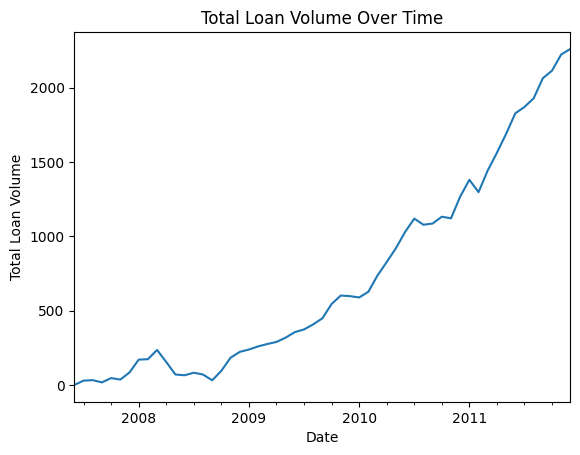

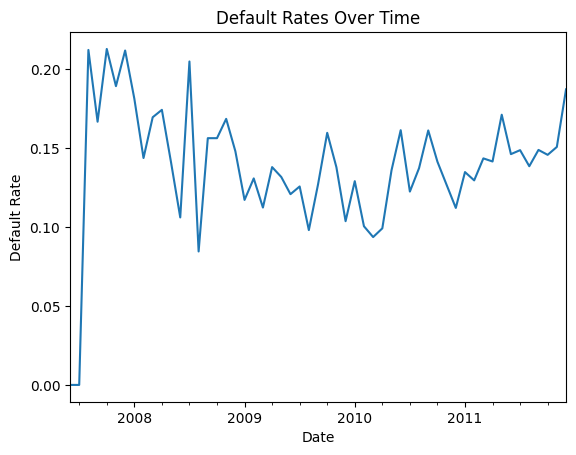

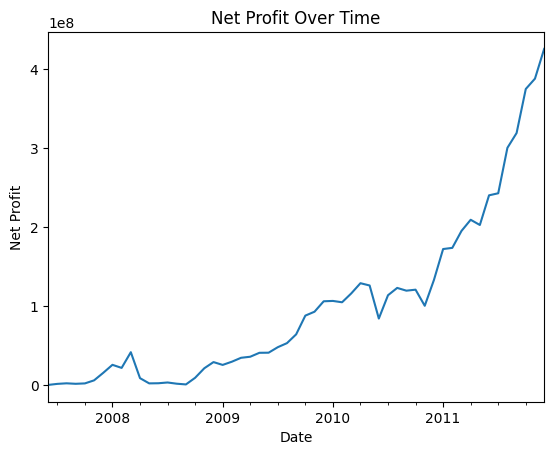

One-sample t-test results for net profit:
Mean net profit: 137748.61176597426
t-statistic: 145.77258982483914
p-value: 0.0
The net profit is significantly different from zero.


In [21]:
# Time Series Analysis
# Ploting total loan volume over time
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'], format='%b-%y')  # Specify date format
loan_volume = loan_data.groupby(loan_data['issue_d'].dt.to_period('M')).size()
loan_volume.plot(title='Total Loan Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Total Loan Volume')
plt.show()

# Ploting default rates over time
default_rates = loan_data.groupby(loan_data['issue_d'].dt.to_period('M'))['loan_status'].apply(lambda x: (x == 'Charged Off').mean())
default_rates.plot(title='Default Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Default Rate')
plt.show()

# Profitability Analysis
# Calculating net profit over time - Example: Net Profit = Total Payments - Total Loan Amount
loan_data['total_payments'] = loan_data['installment'] * loan_data['installment']
loan_data['net_profit'] = loan_data['total_payments'] - loan_data['loan_amnt']
net_profit_mean = loan_data['net_profit'].mean()
net_profit = loan_data.groupby(loan_data['issue_d'].dt.to_period('M'))['net_profit'].sum()
net_profit.plot(title='Net Profit Over Time')
plt.xlabel('Date')
plt.ylabel('Net Profit')
plt.show()


# Statistical Tests
# Performing statistical tests to determine if profitability metrics are significantly different from zero
t_stat, p_value = ttest_1samp(loan_data['net_profit'], 0)

# Printing the results
print("One-sample t-test results for net profit:")
print("Mean net profit:", net_profit_mean)
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpreting the results
alpha = 0.05  # Set the significance level
if p_value < alpha:
    print("The net profit is significantly different from zero.")
else:
    print("The net profit is not significantly different from zero.")
